# Kết nối Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

folder = "/content/drive/MyDrive/IE224-DataAnalysis"

Mounted at /content/drive/


# Import thư viện

In [ ]:
from tqdm import tqdm
from tabulate import tabulate
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

# Đọc dữ liệu

In [ ]:
df = pd.read_csv(folder + '/final_data.csv')
df.head()

,pc_brand,pc_model,elt_condition,elt_warranty,desktop_screen_size,pc_cpu,pc_ram,pc_vga,pc_drive_capacity,elt_origin,usage_information,classify,price
0,NaN,NaN,Đã sử dụng (chưa sửa chữa),>12 tháng,>= 21 inch,Intel Xeon,> 32GB,NVIDIA,256 GB,Việt Nam,In trên bao bì,desktop,13.500.000 đ
1,NaN,NaN,Đã sử dụng (chưa sửa chữa),Còn bảo hành,>= 21 inch,Intel Core i5,8 GB,Khác,500 GB,Đang cập nhật,In trên bao bì,desktop,1.800.000 đ
2,NaN,NaN,Đã sử dụng (chưa sửa chữa),Còn bảo hành,>= 21 inch,Intel Xeon,32 GB,NVIDIA,256 GB,Đang cập nhật,In trên bao bì,desktop,8.500.000 đ
3,NaN,NaN,Mới,Còn bảo hành,>= 21 inch,Intel Xeon,> 32GB,NVIDIA,256 GB,Việt Nam,In trên bao bì,desktop,12.500.000 đ
4,NaN,NaN,Đã sử dụng (chưa sửa chữa),3 tháng,Không bán kèm màn hình,Intel Core i3,8 GB,NVIDIA,128 GB,Đang cập nhật,In trên bao bì,desktop,6.300.000 đ


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8004 entries, 0 to 8003
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   pc_brand             3994 non-null   object
 1   pc_model             3994 non-null   object
 2   elt_condition        7889 non-null   object
 3   elt_warranty         7889 non-null   object
 4   desktop_screen_size  5889 non-null   object
 5   pc_cpu               6761 non-null   object
 6   pc_ram               6727 non-null   object
 7   pc_vga               5639 non-null   object
 8   pc_drive_capacity    6555 non-null   object
 9   elt_origin           7889 non-null   object
 10  usage_information    7889 non-null   object
 11  classify             8004 non-null   object
 12  price                7889 non-null   object
dtypes: object(13)
memory usage: 813.0+ KB


#Các giá trị của các biến phân loại

In [ ]:
chunk_size = 4
unique_values = []

for column in df.columns:
  if column in ["price",
                "pc_ram",
                "pc_drive_capacity",
                "desktop_screen_size",
                "elt_warranty"]:
    continue
  buffer = [item for item in map(str, df[column].unique())]
  unique_values.append({
    'name': column,
    'values':',\n'.join([', '.join(buffer[i:i+chunk_size])
    for i in range(0, len(buffer), chunk_size)]),
    'number_of_unique': len(buffer)})

print(tabulate(
  unique_values,
  headers={"name": "Column Name",
           "values": "Unique Values",
           "number_of_unique": "Number of Unique values"},
  tablefmt="grid"))


+-------------------+---------------------------------------------------------------------------+---------------------------+
| Column Name       | Unique Values                                                             |   Number of Unique values |
+===================+===========================================================================+===========================+
| pc_brand          | nan, Asus, HP, Dell,                                                      |                        16 |
|                   | Apple, Sony, Toshiba, Lenovo,                                             |                           |
|                   | Microsoft, Panasonic, Hãng Khác, MSI,                                     |                           |
|                   | Acer, Samsung, Razer, LG                                                  |                           |
+-------------------+---------------------------------------------------------------------------+---------------------

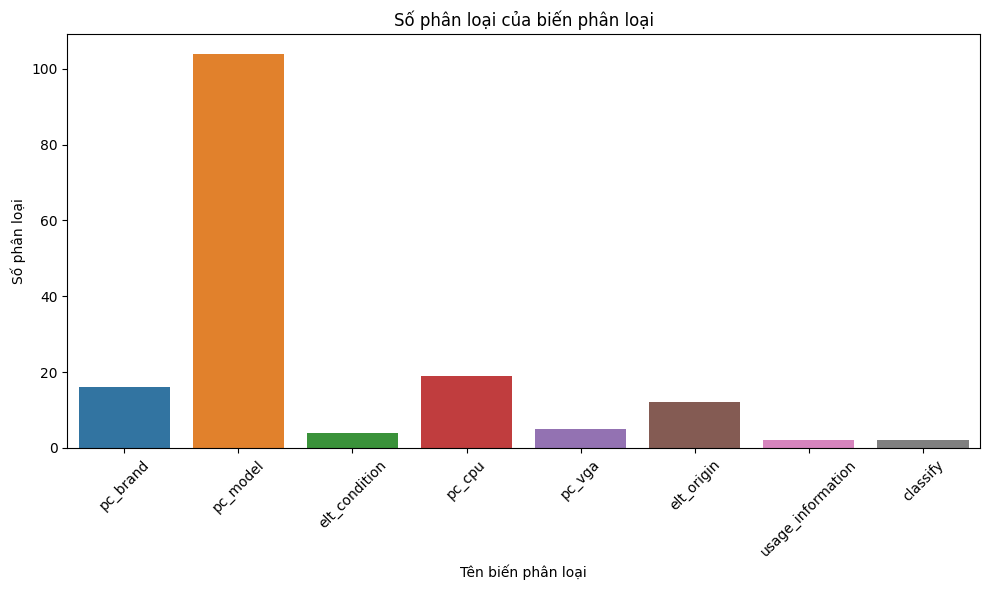

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x='name', y='number_of_unique', data=pd.DataFrame(unique_values))

plt.xlabel('Tên biến phân loại')
plt.ylabel('Số phân loại')
plt.title('Số phân loại của biến phân loại')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Các giá trị bị khuyết

## Số lượng giá trị khuyết

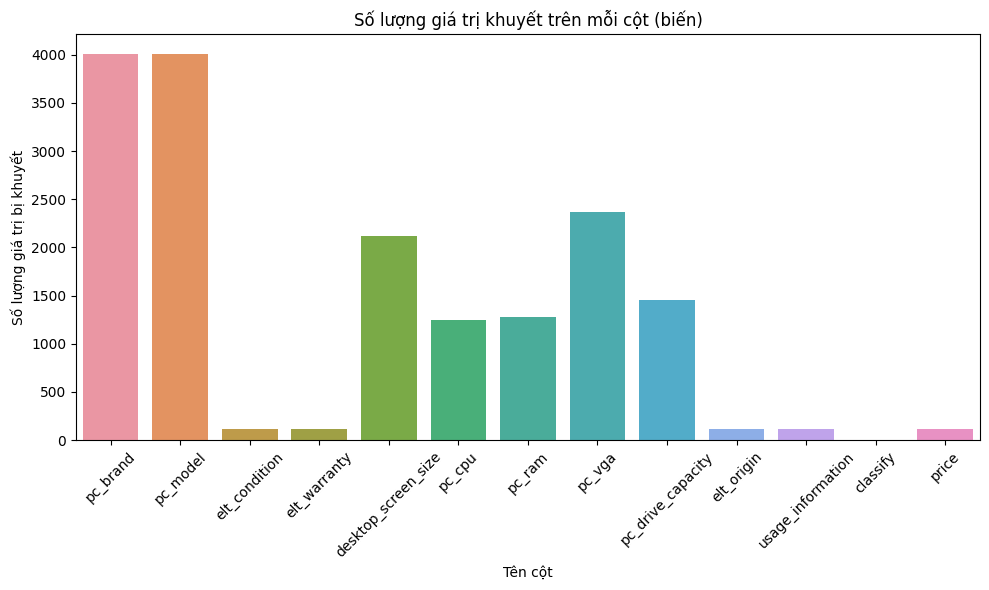

In [ ]:
nan_counts = df.isna().sum()

plt.figure(figsize=(10, 6))

sns.barplot(x=nan_counts.index, y=nan_counts.values)

plt.xlabel('Tên cột')
plt.ylabel('Số lượng giá trị bị khuyết')
plt.title('Số lượng giá trị khuyết trên mỗi cột (biến)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
rows_with_nan_price = df[df['price'].isna()]
rows_with_nan_price

,pc_brand,pc_model,elt_condition,elt_warranty,desktop_screen_size,pc_cpu,pc_ram,pc_vga,pc_drive_capacity,elt_origin,usage_information,classify,price
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,desktop,NaN
52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,desktop,NaN
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,desktop,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,desktop,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,desktop,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,desktop,NaN
3884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,desktop,NaN
3917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,desktop,NaN
3934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,desktop,NaN


In [ ]:
rows_with_nan_price.notna().any()

pc_brand               False
pc_model               False
elt_condition          False
elt_warranty           False
desktop_screen_size    False
pc_cpu                 False
pc_ram                 False
pc_vga                 False
pc_drive_capacity      False
elt_origin             False
usage_information      False
classify                True
price                  False
dtype: bool

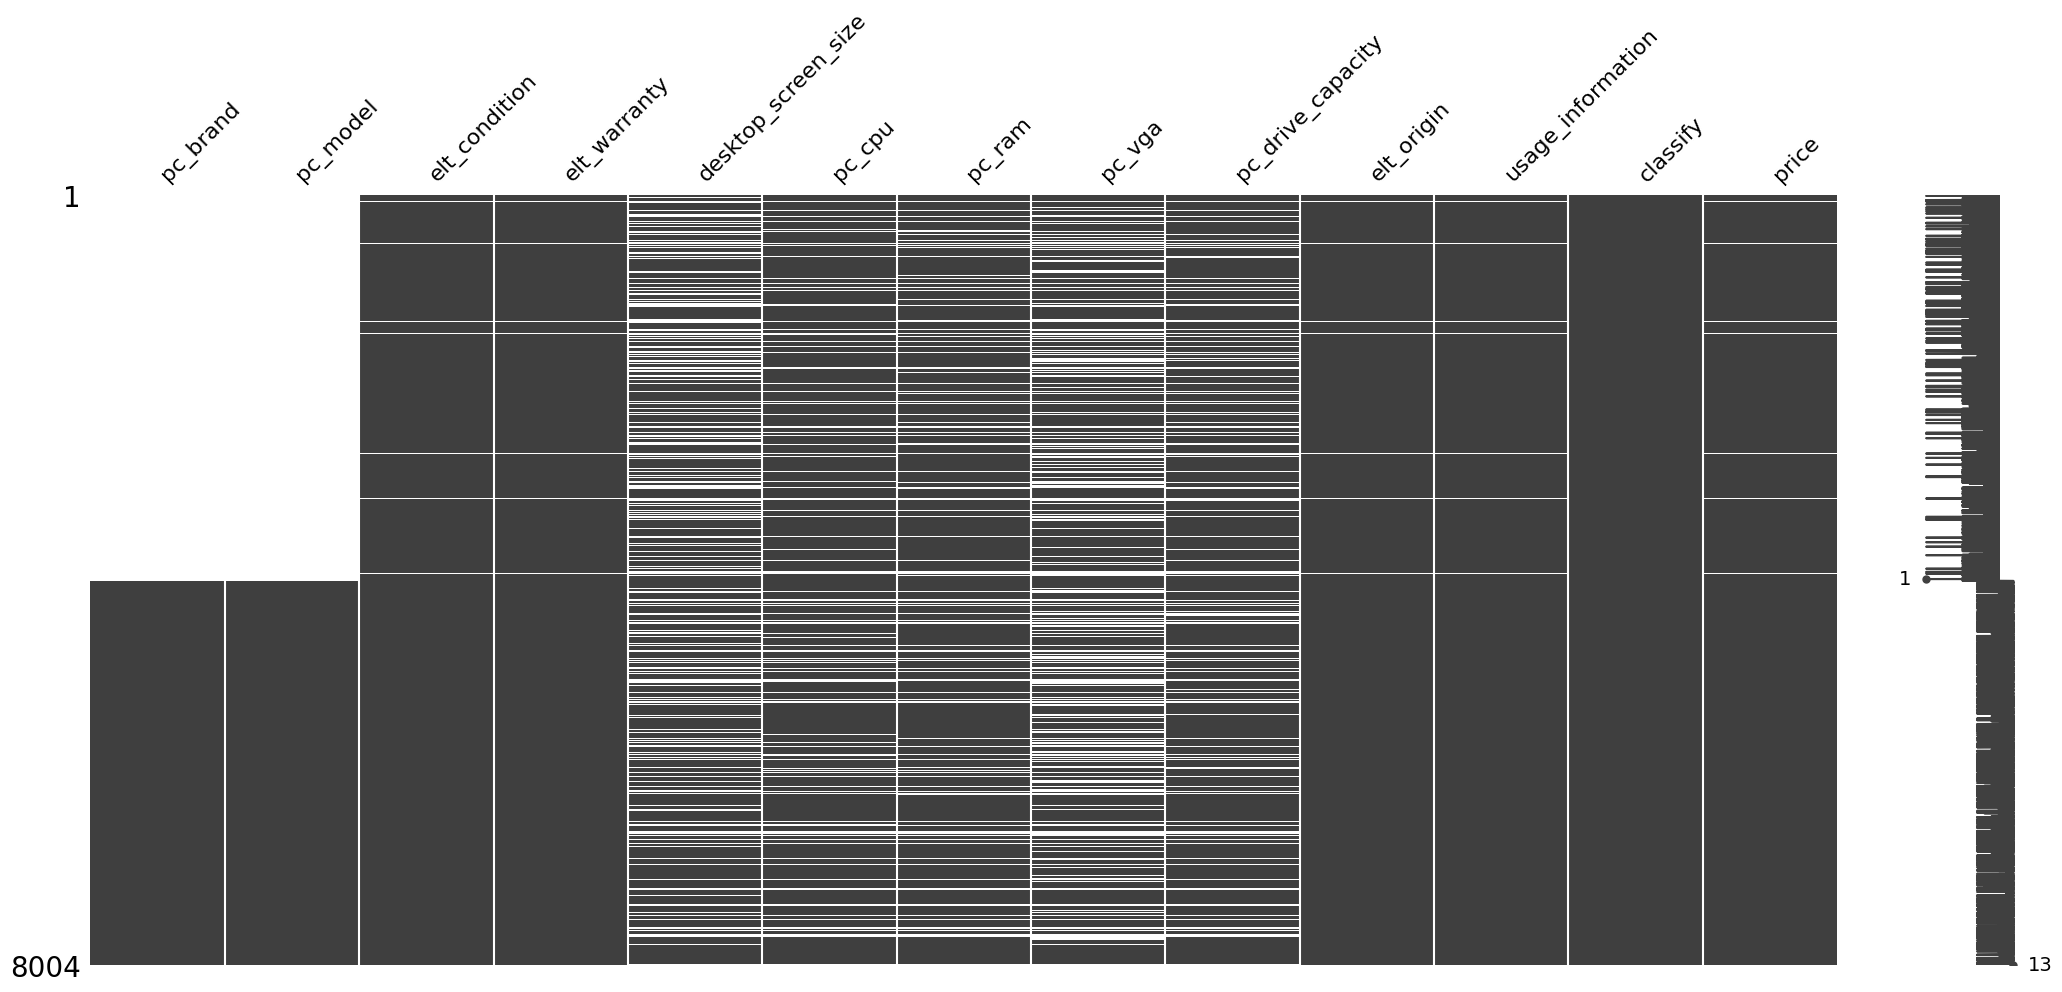

In [ ]:
msno.matrix(df)
plt.show()

## Dữ liệu với giá trị khuyết ở các cột pc_ram, pc_drive_capacity, pc_cpu

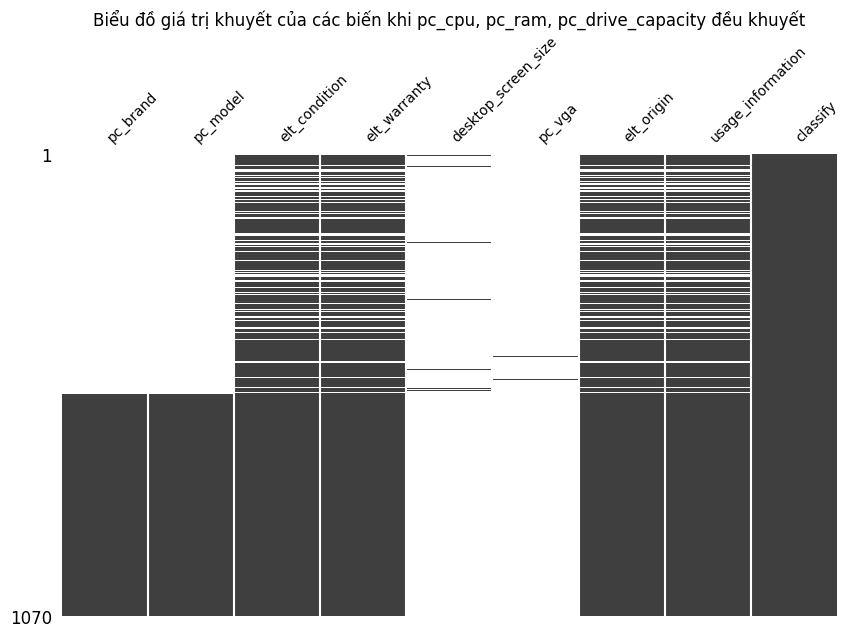

In [ ]:
columns_to_plot = ["pc_brand", "pc_model", "elt_condition", "elt_warranty",
                    "desktop_screen_size", "pc_vga", "elt_origin", "usage_information", "classify"]

df_missing_values = df[df["pc_cpu"].isna() & df["pc_ram"].isna() & df["pc_drive_capacity"].isna()][columns_to_plot]

msno.matrix(df_missing_values, figsize=(10, 6), sparkline=False, fontsize=10)
plt.title('Biểu đồ giá trị khuyết của các biến khi pc_cpu, pc_ram, pc_drive_capacity đều khuyết')
plt.show()


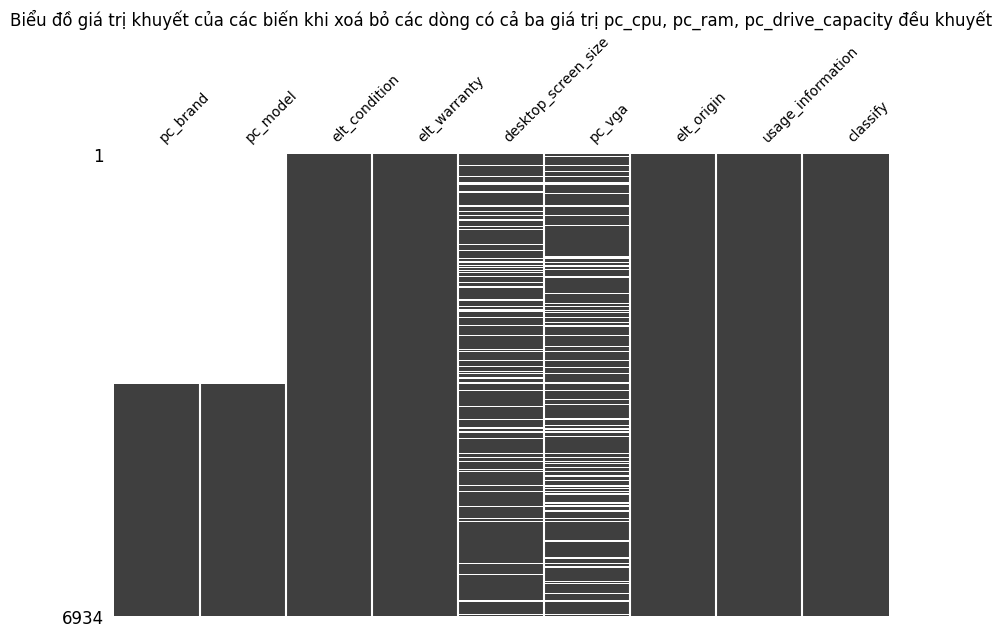

In [ ]:
# Xóa bỏ các dòng có cả ba giá trị đều khuyết
df_no_missing_values = df.dropna(subset=['pc_cpu', 'pc_ram', 'pc_drive_capacity'], how='all')

# Chọn các cột muốn vẽ biểu đồ giá trị khuyết
columns_to_plot = ["pc_brand", "pc_model", "elt_condition", "elt_warranty",
                    "desktop_screen_size", "pc_vga", "elt_origin", "usage_information", "classify"]

# Vẽ biểu đồ giá trị khuyết
msno.matrix(df_no_missing_values[columns_to_plot], figsize=(10, 6), sparkline=False, fontsize=10)
plt.title('Biểu đồ giá trị khuyết của các biến khi xoá bỏ các dòng có cả ba giá trị pc_cpu, pc_ram, pc_drive_capacity đều khuyết')
plt.show()

## Các dữ liệu bị trùng lặp

In [ ]:
duplicate_rows = df[df.duplicated(keep=False)]
count_duplicate_rows = len(duplicate_rows)

print("Số hàng trùng lặp:", count_duplicate_rows)

Số hàng trùng lặp: 957


In [ ]:
duplicate_rows = df[df.duplicated(keep='first')]
count_rows_to_be_deleted = len(duplicate_rows)

print("Số hàng sẽ bị xóa do trùng lặp:", count_rows_to_be_deleted)

Số hàng sẽ bị xóa do trùng lặp: 648


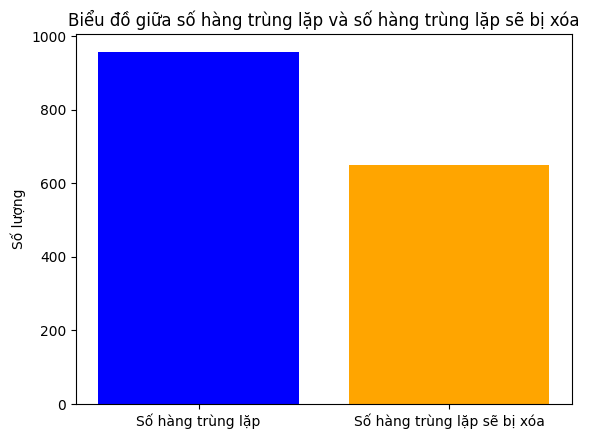

In [ ]:
# Tạo danh sách dữ liệu cho biểu đồ
categories = ['Số hàng trùng lặp', 'Số hàng trùng lặp sẽ bị xóa']
values = [count_duplicate_rows, count_rows_to_be_deleted]

# Vẽ biểu đồ cột
plt.bar(categories, values, color=['blue', 'orange'])
plt.title('Biểu đồ giữa số hàng trùng lặp và số hàng trùng lặp sẽ bị xóa')
plt.ylabel('Số lượng')
plt.show()

# Thăm dò biến pc_brand, pc_model

In [ ]:
brand_model_group = df.groupby(by=['pc_brand', 'pc_model'])

In [ ]:
brand_model_count = df.groupby('pc_brand').count().pc_model

In [ ]:
brands = df.pc_brand.unique()

In [ ]:
count = {}
sum_count = []
for brand in brands:
  if pd.isna(brand) == False:
    try:
     c = brand_model_group.pc_model.get_group((brand, 'Dòng Khác')).count()
    except:
      c = brand_model_group.pc_model.get_group((brand, 'Dòng khác')).count()
    count[brand] = f'{c} / {brand_model_count[brand]}'
    sum_count.append(brand_model_count[brand])

In [ ]:
count

{'Asus': '86 / 412',
 'HP': '88 / 559',
 'Dell': '65 / 1234',
 'Apple': '18 / 610',
 'Sony': '8 / 45',
 'Toshiba': '20 / 50',
 'Lenovo': '51 / 462',
 'Microsoft': '20 / 138',
 'Panasonic': '5 / 11',
 'Hãng Khác': '123 / 123',
 'MSI': '16 / 71',
 'Acer': '33 / 243',
 'Samsung': '9 / 24',
 'Razer': '4 / 7',
 'LG': '1 / 5'}

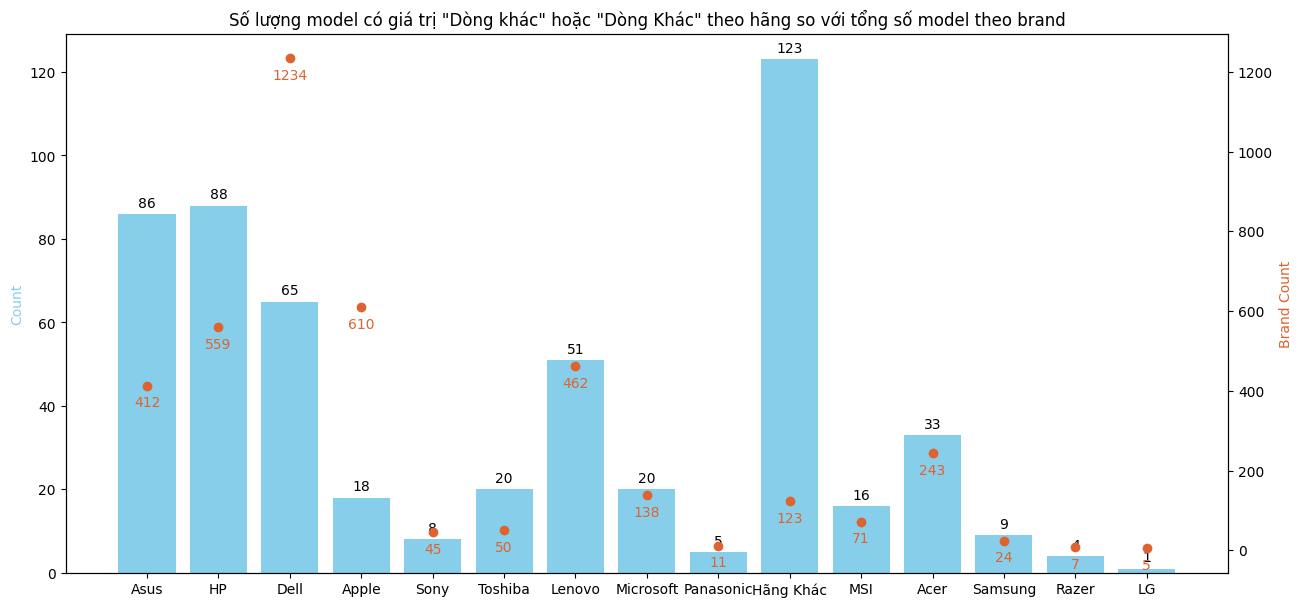

In [ ]:
brands = list(count.keys())
counts = [int(x.split()[0]) for x in list(count.values())]
brand_count = list(sum_count)
# Tạo đối tượng subplot và thiết lập kích thước của biểu đồ
fig, ax1 = plt.subplots(figsize=(15, 7))

# Vẽ cột
bars = ax1.bar(brands, counts, color='skyblue')

# Chú thích giá trị của 'Count' trên mỗi cột
for bar, brand, count_val in zip(bars, brands, counts):
    height = bar.get_height()
    ax1.annotate(count_val, (bar.get_x() + bar.get_width() / 2, height), textcoords="offset points", xytext=(0, 5),
                 ha='center', color='black')

# Tạo đối tượng subplot thứ hai
ax2 = ax1.twinx()
ax2.scatter(brands, brand_count, color='#de632f')

# Chú thích giá trị của 'Brand Count' trên mỗi điểm
for brand, count_val in zip(brands, brand_count):
    ax2.annotate(count_val, (brand, count_val), textcoords="offset points", xytext=(0, -15), ha='center', color='#de632f')

ax1.set_ylabel('Count', color='skyblue')
ax2.set_ylabel('Brand Count', color='#de632f')
plt.title('Số lượng model có giá trị "Dòng khác" hoặc "Dòng Khác" theo hãng so với tổng số model theo brand')

plt.show()

# Thăm dò biến pc_brand, pc_cpu

In [ ]:
brand_cpu_group = df.groupby(by=['pc_brand', 'pc_cpu'])

In [ ]:
brand_cpu_count = df.groupby('pc_brand').count().pc_cpu

In [ ]:
count = {}
sum_count = []

for brand in brands:
  if pd.isna(brand) == False:
    try:
      c = brand_cpu_group.pc_model.get_group((brand, 'Khác')).count()
    except:
      c = 0
    # brand_count = int(brand_count[brand])
    # print(brand_count)
    count[brand] = f'{c} / {brand_cpu_count[brand]}'
    sum_count.append(brand_cpu_count[brand])

In [ ]:
count

{'Asus': '7 / 358',
 'HP': '6 / 482',
 'Dell': '5 / 1080',
 'Apple': '114 / 459',
 'Sony': '0 / 38',
 'Toshiba': '1 / 46',
 'Lenovo': '11 / 407',
 'Microsoft': '7 / 120',
 'Panasonic': '0 / 9',
 'Hãng Khác': '4 / 100',
 'MSI': '0 / 60',
 'Acer': '2 / 198',
 'Samsung': '3 / 23',
 'Razer': '0 / 7',
 'LG': '0 / 4'}

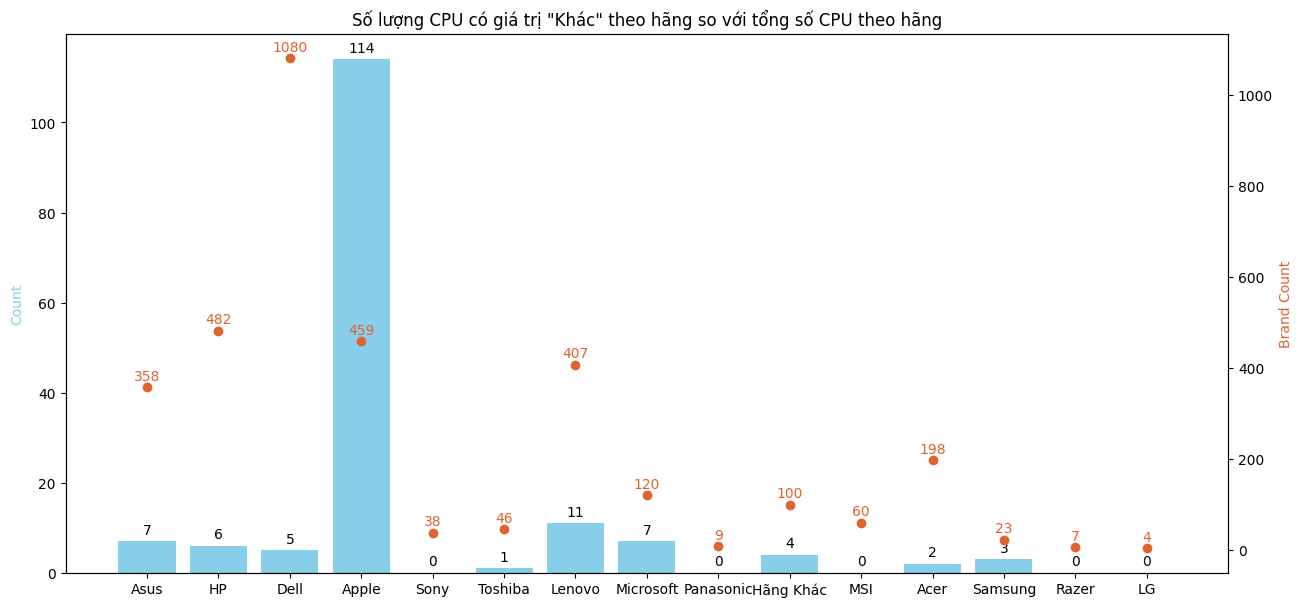

In [ ]:
brands = list(count.keys())
counts = [int(x.split()[0]) for x in list(count.values())]
brand_count = list(sum_count)
# Tạo đối tượng subplot và thiết lập kích thước của biểu đồ
fig, ax1 = plt.subplots(figsize=(15, 7))

# Vẽ cột
bars = ax1.bar(brands, counts, color='skyblue')

# Chú thích giá trị của 'Count' trên mỗi cột
for bar, brand, count_val in zip(bars, brands, counts):
    height = bar.get_height()
    ax1.annotate(count_val, (bar.get_x() + bar.get_width() / 2, height), textcoords="offset points", xytext=(0, 5),
                 ha='center', color='black')

# Tạo đối tượng subplot thứ hai
ax2 = ax1.twinx()
ax2.scatter(brands, brand_count, color='#de632f')

# Chú thích giá trị của 'Brand Count' trên mỗi điểm
for brand, count_val in zip(brands, brand_count):
    ax2.annotate(count_val, (brand, count_val), textcoords="offset points", xytext=(0, 5), ha='center', color='#de632f')

ax1.set_ylabel('Count', color='skyblue')
ax2.set_ylabel('Brand Count', color='#de632f')
plt.title('Số lượng CPU có giá trị "Khác" theo hãng so với tổng số CPU theo hãng')

plt.show()